In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_profiling
import missingno as msno

In [2]:
df_train = pd.read_csv("Training Data.csv")
m=df_train.shape[0]
df_train.head()

,patient_ID,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,130,54,0,2,160,201,0.0,1,163.0,0,0.0,2,1,2,Heart Attack
1,168,63,1,0,130,254,0.0,0,147.0,0,1.4,1,1,3,No Attack
2,258,62,0,0,150,244,0.0,1,154.0,1,1.4,1,0,2,No Attack
3,240,70,1,2,160,269,0.0,1,112.0,1,2.9,1,1,3,No Attack
4,201,60,1,0,125,258,0.0,0,141.0,1,2.8,1,1,3,No Attack


In [3]:
ww = df_train["target"]
ww = pd.get_dummies(ww)
ww = ww["Heart Attack"]

df_corr = df_train.drop('target', axis=1)
df_corr["target"] = ww
df_corr.head()
df_corr.corr()

,patient_ID,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
patient_ID,1.000000,0.181075,0.204856,-0.397515,0.119136,0.054166,-0.060736,-0.064735,-0.420370,0.374311,0.311187,-0.304038,0.406567,0.245329,-0.860392
age,0.181075,1.000000,-0.096681,-0.053008,0.277804,0.194612,0.102819,-0.093132,-0.416991,0.137408,0.239800,-0.173311,0.245763,0.126629,-0.219526
sex,0.204856,-0.096681,1.000000,-0.069332,-0.045613,-0.180647,0.089116,-0.098525,-0.032984,0.131750,0.125741,-0.057959,0.155797,0.216117,-0.309728
cp,-0.397515,-0.053008,-0.069332,1.000000,0.053765,-0.079439,0.063972,0.034329,0.229587,-0.407370,-0.157642,0.122452,-0.211626,-0.125059,0.431790
trestbps,0.119136,0.277804,-0.045613,0.053765,1.000000,0.129928,0.049079,-0.081282,-0.021673,0.045361,0.212620,-0.112836,0.069168,0.075112,-0.157869
chol,0.054166,0.194612,-0.180647,-0.079439,0.129928,1.000000,-0.022202,-0.130288,-0.022860,0.121755,0.059218,-0.022143,0.070628,0.145249,-0.119435
fbs,-0.060736,0.102819,0.089116,0.063972,0.049079,-0.022202,1.000000,-0.093305,0.031023,0.107627,0.011990,-0.061793,0.007797,0.065601,0.029642
restecg,-0.064735,-0.093132,-0.098525,0.034329,-0.081282,-0.130288,-0.093305,1.000000,-0.009837,-0.087276,-0.088941,0.104714,-0.089367,-0.073328,0.176890
thalach,-0.420370,-0.416991,-0.032984,0.229587,-0.021673,-0.022860,0.031023,-0.009837,1.000000,-0.394769,-0.360232,0.422171,-0.211746,-0.101945,0.429328
exang,0.374311,0.137408,0.131750,-0.407370,0.045361,0.121755,0.107627,-0.087276,-0.394769,1.000000,0.265635,-0.280162,0.142163,0.183575,-0.464886


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   patient_ID  250 non-null    int64  
 1   age         250 non-null    int64  
 2   sex         250 non-null    int64  
 3   cp          250 non-null    int64  
 4   trestbps    250 non-null    int64  
 5   chol        250 non-null    int64  
 6   fbs         129 non-null    float64
 7   restecg     250 non-null    int64  
 8   thalach     223 non-null    float64
 9   exang       250 non-null    int64  
 10  oldpeak     250 non-null    float64
 11  slope       250 non-null    int64  
 12  ca          250 non-null    int64  
 13  thal        250 non-null    int64  
 14  target      250 non-null    object 
dtypes: float64(3), int64(11), object(1)
memory usage: 29.4+ KB


In [5]:
df_train.describe()

,patient_ID,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,129.000000,250.000000,223.000000,250.000000,250.00000,250.000000,250.000000,250.000000
mean,152.128000,54.156000,0.688000,0.960000,131.780000,245.256000,0.131783,0.552000,149.434978,0.336000,1.06640,1.396000,0.724000,2.340000
std,87.328855,9.380171,0.464239,1.013166,18.048006,51.816389,0.339573,0.521906,22.248475,0.473286,1.14751,0.613751,1.025686,0.621244
min,1.000000,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,88.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,76.250000,46.000000,0.000000,0.000000,120.000000,210.250000,0.000000,0.000000,135.000000,0.000000,0.00000,1.000000,0.000000,2.000000
50%,151.500000,56.000000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.000000,0.000000,0.80000,1.000000,0.000000,2.000000
75%,226.750000,61.000000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,165.500000,1.000000,1.80000,2.000000,1.000000,3.000000
max,302.000000,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,2.000000,4.000000,3.000000


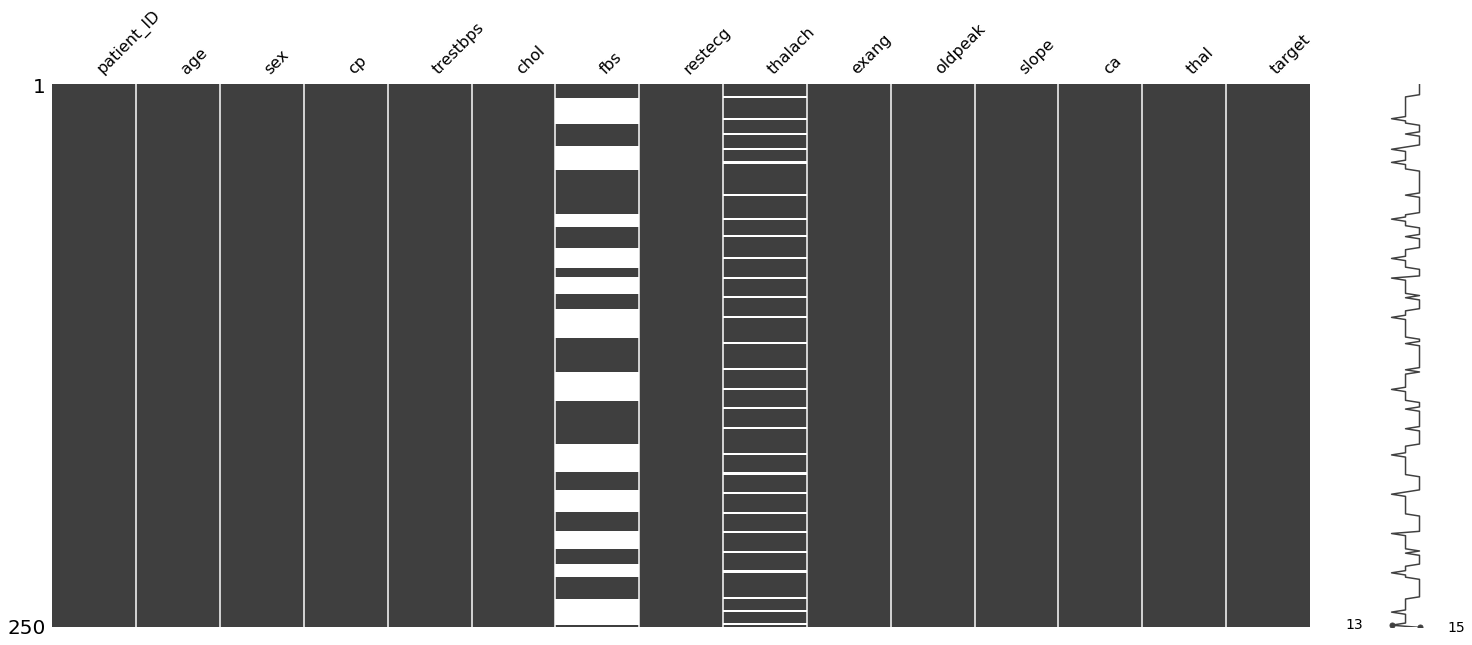

In [6]:
msno.matrix(df_train);

In [7]:
df_train.isnull().mean()

patient_ID    0.000
age           0.000
sex           0.000
cp            0.000
trestbps      0.000
chol          0.000
fbs           0.484
restecg       0.000
thalach       0.108
exang         0.000
oldpeak       0.000
slope         0.000
ca            0.000
thal          0.000
target        0.000
dtype: float64

In [8]:
df_train_1 = df_train.drop(["fbs","patient_ID"],axis=1)
df_train_1.head()

,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,54,0,2,160,201,1,163.0,0,0.0,2,1,2,Heart Attack
1,63,1,0,130,254,0,147.0,0,1.4,1,1,3,No Attack
2,62,0,0,150,244,1,154.0,1,1.4,1,0,2,No Attack
3,70,1,2,160,269,1,112.0,1,2.9,1,1,3,No Attack
4,60,1,0,125,258,0,141.0,1,2.8,1,1,3,No Attack


In [9]:
df_train_1["thalach"].fillna(df_train_1["thalach"].mean(),inplace=True)
df_train_1.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [10]:
x_train = df_train_1.drop("target",axis=1)
x_train = (x_train - x_train.min()) / (x_train.max() - x_train.min())
x_train = x_train.to_numpy()
y_train = df_train_1["target"]
y_train = pd.get_dummies(y_train)
y_train = y_train["Heart Attack"]
y_train = y_train.to_numpy()
y_train = y_train.reshape((x_train.shape[0],1))

In [11]:
def sigmoid(input):    
  output = 1 / (1 + np.exp(-input))
  return output

In [12]:
def costFunction(theta, X, y):
    J=0
    h = sigmoid(np.dot(X, theta.T))
    J = 1/m * np.sum(-y*np.log(h) - (1-y) * np.log(1-h))
    return J

In [13]:
def gradientDecsent(iterations, alpha, x, y):
  m = x.shape[0]
  theta = np.full((1, x.shape[1]), 0)
  for i in range(iterations):
    theta = theta - (alpha / m) * np.transpose(sigmoid(np.dot(x, theta.T)) - y).dot(x)
  return theta

In [14]:
#theta, cost_history = gradientDecsent(200000, 0.0042, x, y)
theta = gradientDecsent(200000, 0.002, x_train, y_train)
print(theta)

[[ 0.24531647 -1.64551128  2.73070693 -1.49320849 -0.4345691   1.54780219
   3.12701855 -1.1781719  -1.91297015  1.87963268 -2.56279848 -1.76783633]]


In [15]:
cost = costFunction(theta,x_train,y_train)
print(cost)

-41.35087180764372


In [16]:
test_set = pd.read_csv('Testing Data.csv')
ID = test_set["patient_ID"]
test_set.drop(["fbs","patient_ID"],axis=1,inplace=True)
test_set.head()

,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,slope,ca,thal
0,47,1,2,138,257,0,156,0,0.0,2,0,2
1,70,1,0,130,322,0,109,0,2.4,1,3,2
2,56,0,1,140,294,0,153,0,1.3,1,0,2
3,67,1,0,160,286,0,108,1,1.5,1,3,2
4,55,1,0,140,217,1,111,1,5.6,0,0,3


In [17]:
test_set = (test_set - test_set.min()) / (test_set.max() - test_set.min())
x_test = test_set.to_numpy()
x_test.shape

(53, 12)

In [18]:
p= sigmoid(np.dot(x_test, theta.T))

In [19]:
y_pred_final = []
for i in p:
  if i >= 0.5:
    y_pred_final.append(1)
  else:
    y_pred_final.append(0)
print(y_pred_final)      

[1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1]


In [20]:
sub = pd.DataFrame(ID,columns=["patient_ID"])
sub.head()

,patient_ID
0,47
1,234
2,6
3,165
4,221


In [21]:
sub["target"] = y_pred_final 

In [22]:
sub.head()

,patient_ID,target
0,47,1
1,234,0
2,6,1
3,165,0
4,221,0


In [23]:
sub["target"] = np.where(sub["target"]==1,"Heart Attack","No Attack")
sub.head()

,patient_ID,target
0,47,Heart Attack
1,234,No Attack
2,6,Heart Attack
3,165,No Attack
4,221,No Attack
